# Exploratory Data Analysis of IPL Matches(2008-2024)

## Breif Info-

The Indian Premier League (IPL) is a professional cricket league in India where teams representing different cities compete in T20 cricket matches (a shorter format of cricket lasting about 3 hours)

This comprehensive dataset covers 13 years of IPL history (2008-2024), containing detailed information about matches, players, teams, and results. It's perfect for analyzing cricket performance metrics and understanding various factors affecting match outcomes.

This dataset contains two csv files-
1. deliveries.csv conatins complete ball-by-ball dataset
2. matches.csv contains information about Match Summaries

### Objective-
To explore patterns and insights in IPL cricket matches from 2008-2024.


* Examining team performances
* Player statistics
* match outcomes
* trends over seasons.


In [1]:
#ignoring warnings to keep the output clean
import warnings
warnings.filterwarnings('ignore')

## Dataset Overview

When starting data analysis, understanding your dataset thoroughly is essential before diving into deeper analysis.

In [2]:
import pandas as pd
df=pd.read_csv('/kaggle/input/ipl-complete-dataset-20082020/matches.csv')
df.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [3]:
#Knowing the number of rows and columns gives you a sense of the dataset's size and complexity.
print(df.shape)


(1095, 20)


In [4]:
# Column names tell you what variables you have to work with for your analysis.
print(df.columns)


Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'],
      dtype='object')


In [5]:
#Different datatypes (integers, strings, dates) require different handling techniques.
print("matches.csv-\n")
print(df.info())
 

matches.csv-

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  

In [6]:
#Percentages of Missing Values
mi=df.isnull().sum().sort_values(ascending=False)/len(df)
mi*100

method             98.082192
city                4.657534
result_margin       1.735160
winner              0.456621
player_of_match     0.456621
target_overs        0.273973
target_runs         0.273973
id                  0.000000
umpire1             0.000000
super_over          0.000000
result              0.000000
toss_decision       0.000000
season              0.000000
toss_winner         0.000000
team2               0.000000
team1               0.000000
venue               0.000000
match_type          0.000000
date                0.000000
umpire2             0.000000
dtype: float64

<Axes: >

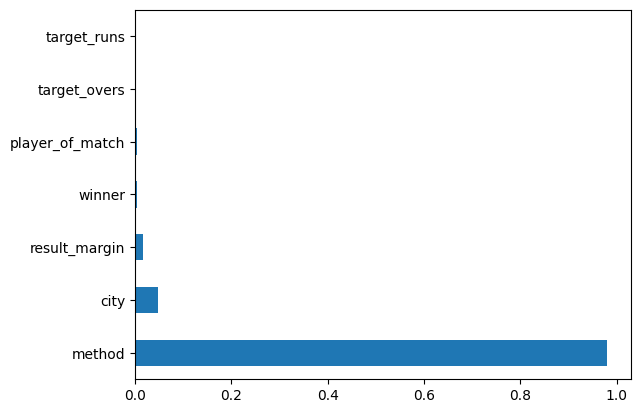

In [7]:
#only those colums which have missing values>0
mi[mi!=0].plot(kind='barh')

## Data Cleaning


### Handling Inconsistent Data
Teams might be referred to differently across records.

In [8]:
#check for duplicated rows
df.duplicated().sum()

0

In [9]:
# Check unique team names to identify inconsistencies
print("Unique team1 values:", df['team1'].unique())
print("Unique team2 values:", df['team2'].unique())
print("Unique winner values:", df['winner'].unique())
print("Unique toss_winner values:", df['toss_winner'].unique())

Unique team1 values: ['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Rajasthan Royals'
 'Deccan Chargers' 'Chennai Super Kings' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Gujarat Lions'
 'Rising Pune Supergiants' 'Rising Pune Supergiant' 'Delhi Capitals'
 'Punjab Kings' 'Lucknow Super Giants' 'Gujarat Titans'
 'Royal Challengers Bengaluru']
Unique team2 values: ['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Royal Challengers Bangalore' 'Deccan Chargers' 'Kings XI Punjab'
 'Delhi Daredevils' 'Mumbai Indians' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Rising Pune Supergiants'
 'Gujarat Lions' 'Rising Pune Supergiant' 'Delhi Capitals' 'Punjab Kings'
 'Gujarat Titans' 'Lucknow Super Giants' 'Royal Challengers Bengaluru']
Unique winner values: ['Kolkata Knight Riders' 'Chennai Super Kings' 'Delhi Daredevils'
 'Royal Challengers Bangalore' 'Rajasthan Royals' 'Kings XI P

In [10]:
# Creating a mapping for inconsistent team names
team_name_mapping = {
    'Rising Pune Supergiants': 'Rising Pune Supergiant',
    'Delhi Daredevils': 'Delhi Capitals',     
    'Deccan Chargers': 'Sunrisers Hyderabad',
    'Kings XI Punjab': 'Punjab Kings',
    'Royal Challengers Bengaluru': 'Royal Challengers Bangalore',
}

df['team1'] = df['team1'].replace(team_name_mapping)
df['team2'] = df['team2'].replace(team_name_mapping)
df['winner'] = df['winner'].replace(team_name_mapping)
df['toss_winner'] = df['toss_winner'].replace(team_name_mapping)

print("\nUnique team1 values after standardization:", df['team1'].unique())
print("Unique team2 values after standardization:", df['team2'].unique())
print("Unique winner values after standardization:", df['winner'].unique())
print("Unique winner values after standardization:", df['toss_winner'].unique())


Unique team1 values after standardization: ['Royal Challengers Bangalore' 'Punjab Kings' 'Delhi Capitals'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Rajasthan Royals'
 'Sunrisers Hyderabad' 'Chennai Super Kings' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Gujarat Lions' 'Rising Pune Supergiant'
 'Lucknow Super Giants' 'Gujarat Titans']
Unique team2 values after standardization: ['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Royal Challengers Bangalore' 'Sunrisers Hyderabad' 'Punjab Kings'
 'Delhi Capitals' 'Mumbai Indians' 'Kochi Tuskers Kerala' 'Pune Warriors'
 'Rising Pune Supergiant' 'Gujarat Lions' 'Gujarat Titans'
 'Lucknow Super Giants']
Unique winner values after standardization: ['Kolkata Knight Riders' 'Chennai Super Kings' 'Delhi Capitals'
 'Royal Challengers Bangalore' 'Rajasthan Royals' 'Punjab Kings'
 'Sunrisers Hyderabad' 'Mumbai Indians' 'Pune Warriors'
 'Kochi Tuskers Kerala' nan 'Rising Pune Supergiant' 'Gujarat Lions'
 'Gujarat Titans' 'Lucknow Supe

### Converting Data Types
Proper data types improve analysis efficiency and enable time-series analysis.

In [11]:
import pandas as pd
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['season'] = pd.to_numeric(df['season'], errors='coerce')
df['season'] = df['season'].fillna(0).astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               1095 non-null   int64         
 1   season           1095 non-null   int64         
 2   city             1044 non-null   object        
 3   date             1095 non-null   datetime64[ns]
 4   match_type       1095 non-null   object        
 5   player_of_match  1090 non-null   object        
 6   venue            1095 non-null   object        
 7   team1            1095 non-null   object        
 8   team2            1095 non-null   object        
 9   toss_winner      1095 non-null   object        
 10  toss_decision    1095 non-null   object        
 11  winner           1090 non-null   object        
 12  result           1095 non-null   object        
 13  result_margin    1076 non-null   float64       
 14  target_runs      1092 non-null   float64

### Handling Missing or Null Values
Missing data can skew the analysis results or cause errors in calculations.

In [12]:
#there are lot of null values in the method column
#D/L is used for rain affected matches only
#therefore we will fill 'regular' for all the other matches
df['method'].fillna('regular', inplace=True)

In [13]:
df.isnull().sum()

id                  0
season              0
city               51
date                0
match_type          0
player_of_match     5
venue               0
team1               0
team2               0
toss_winner         0
toss_decision       0
winner              5
result              0
result_margin      19
target_runs         3
target_overs        3
super_over          0
method              0
umpire1             0
umpire2             0
dtype: int64

In [14]:
df[df['city'].isnull()]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
399,729281,2014,NaN,2014-04-17,League,YS Chahal,Sharjah Cricket Stadium,Delhi Capitals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,8.0,146.0,20.0,N,regular,Aleem Dar,S Ravi
402,729287,2014,NaN,2014-04-19,League,PA Patel,Dubai International Cricket Stadium,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,7.0,116.0,20.0,N,regular,Aleem Dar,AK Chaudhary
403,729289,2014,NaN,2014-04-19,League,JP Duminy,Dubai International Cricket Stadium,Kolkata Knight Riders,Delhi Capitals,Kolkata Knight Riders,bat,Delhi Capitals,wickets,4.0,167.0,20.0,N,regular,Aleem Dar,VA Kulkarni
404,729291,2014,NaN,2014-04-20,League,GJ Maxwell,Sharjah Cricket Stadium,Rajasthan Royals,Punjab Kings,Punjab Kings,field,Punjab Kings,wickets,7.0,192.0,20.0,N,regular,BF Bowden,M Erasmus
406,729295,2014,NaN,2014-04-22,League,GJ Maxwell,Sharjah Cricket Stadium,Punjab Kings,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Punjab Kings,runs,72.0,194.0,20.0,N,regular,M Erasmus,S Ravi
407,729297,2014,NaN,2014-04-23,League,RA Jadeja,Dubai International Cricket Stadium,Rajasthan Royals,Chennai Super Kings,Rajasthan Royals,field,Chennai Super Kings,runs,7.0,141.0,20.0,N,regular,HDPK Dharmasena,RK Illingworth
408,729299,2014,NaN,2014-04-24,League,CA Lynn,Sharjah Cricket Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,2.0,151.0,20.0,N,regular,Aleem Dar,VA Kulkarni
409,729301,2014,NaN,2014-04-25,League,AJ Finch,Dubai International Cricket Stadium,Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,bat,Sunrisers Hyderabad,runs,4.0,185.0,20.0,N,regular,M Erasmus,S Ravi
410,729303,2014,NaN,2014-04-25,League,MM Sharma,Dubai International Cricket Stadium,Chennai Super Kings,Mumbai Indians,Mumbai Indians,bat,Chennai Super Kings,wickets,7.0,142.0,20.0,N,regular,BF Bowden,M Erasmus
413,729309,2014,NaN,2014-04-27,League,M Vijay,Sharjah Cricket Stadium,Delhi Capitals,Mumbai Indians,Mumbai Indians,bat,Delhi Capitals,wickets,6.0,126.0,20.0,N,regular,Aleem Dar,VA Kulkarni


In [15]:
#as the venue of the match is in Dubai
df['city'].fillna('Dubai',inplace=True)

In [16]:
df.isnull().sum()

id                  0
season              0
city                0
date                0
match_type          0
player_of_match     5
venue               0
team1               0
team2               0
toss_winner         0
toss_decision       0
winner              5
result              0
result_margin      19
target_runs         3
target_overs        3
super_over          0
method              0
umpire1             0
umpire2             0
dtype: int64

In [17]:
df[df['result_margin'].isnull()]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
66,392190,2009,Cape Town,2009-04-23,League,YK Pathan,Newlands,Kolkata Knight Riders,Rajasthan Royals,Kolkata Knight Riders,field,Rajasthan Royals,tie,NaN,151.0,20.0,Y,regular,MR Benson,M Erasmus
130,419121,0,Chennai,2010-03-21,League,J Theron,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,Punjab Kings,Chennai Super Kings,field,Punjab Kings,tie,NaN,137.0,20.0,Y,regular,K Hariharan,DJ Harper
241,501265,2011,Delhi,2011-05-21,League,NaN,Feroz Shah Kotla,Delhi Capitals,Pune Warriors,Delhi Capitals,bat,NaN,no result,NaN,NaN,NaN,N,regular,SS Hazare,RJ Tucker
328,598004,2013,Hyderabad,2013-04-07,League,GH Vihari,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,bat,Sunrisers Hyderabad,tie,NaN,131.0,20.0,Y,regular,AK Chaudhary,S Ravi
342,598017,2013,Bangalore,2013-04-16,League,V Kohli,M Chinnaswamy Stadium,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,field,Royal Challengers Bangalore,tie,NaN,153.0,20.0,Y,regular,M Erasmus,VA Kulkarni
416,729315,2014,Abu Dhabi,2014-04-29,League,JP Faulkner,Sheikh Zayed Stadium,Kolkata Knight Riders,Rajasthan Royals,Rajasthan Royals,bat,Rajasthan Royals,tie,NaN,153.0,20.0,Y,regular,Aleem Dar,AK Chaudhary
475,829741,2015,Ahmedabad,2015-04-21,League,SE Marsh,"Sardar Patel Stadium, Motera",Rajasthan Royals,Punjab Kings,Punjab Kings,field,Punjab Kings,tie,NaN,192.0,20.0,Y,regular,M Erasmus,S Ravi
485,829763,2015,Bangalore,2015-04-29,League,NaN,M Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,no result,NaN,NaN,NaN,N,regular,JD Cloete,PG Pathak
511,829813,2015,Bangalore,2015-05-17,League,NaN,M Chinnaswamy Stadium,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,field,NaN,no result,NaN,188.0,20.0,N,regular,HDPK Dharmasena,K Srinivasan
610,1082625,2017,Rajkot,2017-04-29,League,KH Pandya,Saurashtra Cricket Association Stadium,Gujarat Lions,Mumbai Indians,Gujarat Lions,bat,Mumbai Indians,tie,NaN,154.0,20.0,Y,regular,AK Chaudhary,CB Gaffaney


In [18]:
#since all the were tie
df['result_margin'].fillna(0, inplace=True)

In [19]:
df.isnull().sum()

id                 0
season             0
city               0
date               0
match_type         0
player_of_match    5
venue              0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             5
result             0
result_margin      0
target_runs        3
target_overs       3
super_over         0
method             0
umpire1            0
umpire2            0
dtype: int64

In [20]:
df[df['winner'].isnull()]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
241,501265,2011,Delhi,2011-05-21,League,NaN,Feroz Shah Kotla,Delhi Capitals,Pune Warriors,Delhi Capitals,bat,NaN,no result,0.0,NaN,NaN,N,regular,SS Hazare,RJ Tucker
485,829763,2015,Bangalore,2015-04-29,League,NaN,M Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,no result,0.0,NaN,NaN,N,regular,JD Cloete,PG Pathak
511,829813,2015,Bangalore,2015-05-17,League,NaN,M Chinnaswamy Stadium,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,field,NaN,no result,0.0,188.0,20.0,N,regular,HDPK Dharmasena,K Srinivasan
744,1178424,2019,Bengaluru,2019-04-30,League,NaN,M.Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,no result,0.0,63.0,5.0,N,regular,NJ Llong,UV Gandhe
994,1359519,2023,Lucknow,2023-05-03,League,NaN,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow Super Giants,Chennai Super Kings,Chennai Super Kings,field,NaN,no result,0.0,NaN,NaN,N,regular,AK Chaudhary,NA Patwardhan


In [21]:
#as the player_of_match ,winner and result is missing so i will drop these rows 
df.drop([241,485,511,744,994], inplace=True)

In [22]:
df.isnull().sum()

id                 0
season             0
city               0
date               0
match_type         0
player_of_match    0
venue              0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
target_runs        0
target_overs       0
super_over         0
method             0
umpire1            0
umpire2            0
dtype: int64

## now we will clean data for deliveries.csv

In [23]:
pf=pd.read_csv('/kaggle/input/ipl-complete-dataset-20082020/deliveries.csv')
pf.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [24]:
pf.shape

(260920, 17)

In [25]:
pf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [26]:
m=pf.isnull().sum().sort_values(ascending=False)
m

fielder             251566
dismissal_kind      247970
player_dismissed    247970
extras_type         246795
batsman_runs             0
is_wicket                0
total_runs               0
extra_runs               0
match_id                 0
inning                   0
bowler                   0
batter                   0
ball                     0
over                     0
bowling_team             0
batting_team             0
non_striker              0
dtype: int64

<Axes: >

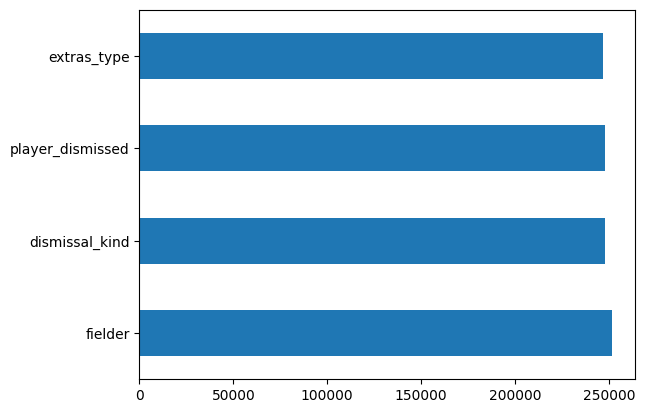

In [27]:
#only those colums which have missing values>0
m[m!=0].plot(kind='barh')

In [28]:
#check for duplicated rows
pf.duplicated().sum()

0

In [29]:
# Check unique team names to identify inconsistencies
print("Unique bowling_team values:", pf['bowling_team'].unique())
print("Unique batting_team values:", pf['batting_team'].unique())

Unique bowling_team values: ['Royal Challengers Bangalore' 'Kolkata Knight Riders' 'Kings XI Punjab'
 'Chennai Super Kings' 'Delhi Daredevils' 'Rajasthan Royals'
 'Mumbai Indians' 'Deccan Chargers' 'Kochi Tuskers Kerala' 'Pune Warriors'
 'Sunrisers Hyderabad' 'Rising Pune Supergiants' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Delhi Capitals' 'Punjab Kings' 'Gujarat Titans'
 'Lucknow Super Giants' 'Royal Challengers Bengaluru']
Unique batting_team values: ['Kolkata Knight Riders' 'Royal Challengers Bangalore'
 'Chennai Super Kings' 'Kings XI Punjab' 'Rajasthan Royals'
 'Delhi Daredevils' 'Mumbai Indians' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors' 'Sunrisers Hyderabad'
 'Rising Pune Supergiants' 'Gujarat Lions' 'Rising Pune Supergiant'
 'Delhi Capitals' 'Punjab Kings' 'Lucknow Super Giants' 'Gujarat Titans'
 'Royal Challengers Bengaluru']


In [30]:
# Creating a mapping for inconsistent team names
team_name_mapping = {
    'Rising Pune Supergiants': 'Rising Pune Supergiant',
    'Delhi Daredevils': 'Delhi Capitals',     
    'Deccan Chargers': 'Sunrisers Hyderabad',
    'Kings XI Punjab': 'Punjab Kings',
}

pf['bowling_team']=pf['bowling_team'].replace(team_name_mapping)
pf['batting_team'] = pf['batting_team'].replace(team_name_mapping)

print("\nUnique bowling_team values after standardization:", pf['bowling_team'].unique())
print("Unique batting_team values after standardization:", pf['batting_team'].unique())



Unique bowling_team values after standardization: ['Royal Challengers Bangalore' 'Kolkata Knight Riders' 'Punjab Kings'
 'Chennai Super Kings' 'Delhi Capitals' 'Rajasthan Royals'
 'Mumbai Indians' 'Sunrisers Hyderabad' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Rising Pune Supergiant' 'Gujarat Lions' 'Gujarat Titans'
 'Lucknow Super Giants' 'Royal Challengers Bengaluru']
Unique batting_team values after standardization: ['Kolkata Knight Riders' 'Royal Challengers Bangalore'
 'Chennai Super Kings' 'Punjab Kings' 'Rajasthan Royals' 'Delhi Capitals'
 'Mumbai Indians' 'Sunrisers Hyderabad' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Rising Pune Supergiant' 'Gujarat Lions'
 'Lucknow Super Giants' 'Gujarat Titans' 'Royal Challengers Bengaluru']


In [31]:
# as these columns are only populated for specific events
columns_to_fill = ['dismissal_kind', 'player_dismissed', 'fielder', 'extras_type']
pf[columns_to_fill] = pf[columns_to_fill].fillna('NA')

In [32]:
pf.isnull().sum()
#no missing data

match_id            0
inning              0
batting_team        0
bowling_team        0
over                0
ball                0
batter              0
bowler              0
non_striker         0
batsman_runs        0
extra_runs          0
total_runs          0
extras_type         0
is_wicket           0
player_dismissed    0
dismissal_kind      0
fielder             0
dtype: int64

# Exploratory Analysis and Visualization

In [33]:
df.describe()

,id,season,date,result_margin,target_runs,target_overs
count,1.090000e+03,1090.000000,1090,1090.000000,1090.000000,1090.000000
mean,9.046681e+05,1687.441284,2016-06-24 16:57:14.862385408,17.037615,165.757798,19.772661
min,3.359820e+05,0.000000,2008-04-18 00:00:00,0.000000,43.000000,5.000000
25%,5.483312e+05,2011.000000,2012-04-21 00:00:00,5.000000,146.000000,20.000000
50%,9.809620e+05,2015.000000,2016-05-03 12:00:00,8.000000,166.000000,20.000000
75%,1.254063e+06,2021.000000,2021-04-13 18:00:00,19.750000,187.000000,20.000000
max,1.426312e+06,2024.000000,2024-05-26 00:00:00,146.000000,288.000000,20.000000
std,3.680153e+05,745.843109,NaN,21.734086,33.305775,1.517969


In [34]:
pf.describe()

,match_id,inning,over,ball,batsman_runs,extra_runs,total_runs,is_wicket
count,2.609200e+05,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000
mean,9.070665e+05,1.483531,9.197677,3.624486,1.265001,0.067806,1.332807,0.049632
std,3.679913e+05,0.502643,5.683484,1.814920,1.639298,0.343265,1.626416,0.217184
min,3.359820e+05,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,5.483340e+05,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,9.809670e+05,1.000000,9.000000,4.000000,1.000000,0.000000,1.000000,0.000000
75%,1.254066e+06,2.000000,14.000000,5.000000,1.000000,0.000000,1.000000,0.000000
max,1.426312e+06,6.000000,19.000000,11.000000,6.000000,7.000000,7.000000,1.000000


## 1.Total Matches Played

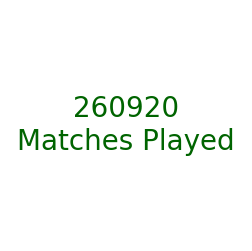

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
total_matches = len(pf)

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(3, 3))
ax.text(0.5, 0.5, f"{total_matches}\nMatches Played", fontsize=20, ha='center', va='center', color="#006400")
ax.axis('off')
plt.show()

## 2.Matches Per Season

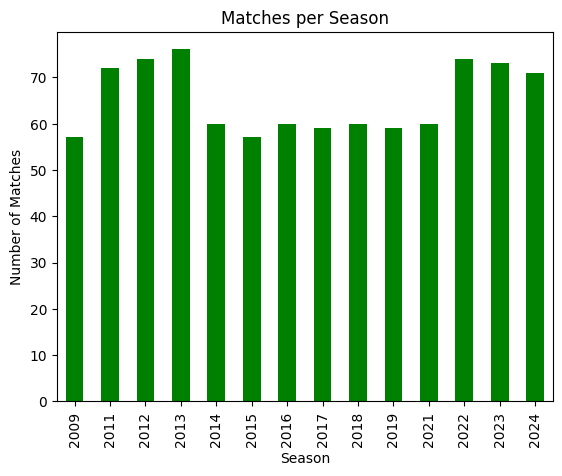

In [36]:
df = df[df['season'] != 0]
matches_per_season = df.groupby('season')['id'].count()
matches_per_season.plot(kind='bar', title='Matches per Season', xlabel='Season', ylabel='Number of Matches', color='green')
plt.show()


## 3. Total teams

In [37]:
teams = pd.unique(df['team1'].tolist() + df['team2'].tolist())
print("Total unique teams:", len(teams))

Total unique teams: 14


## 4.Most Wins

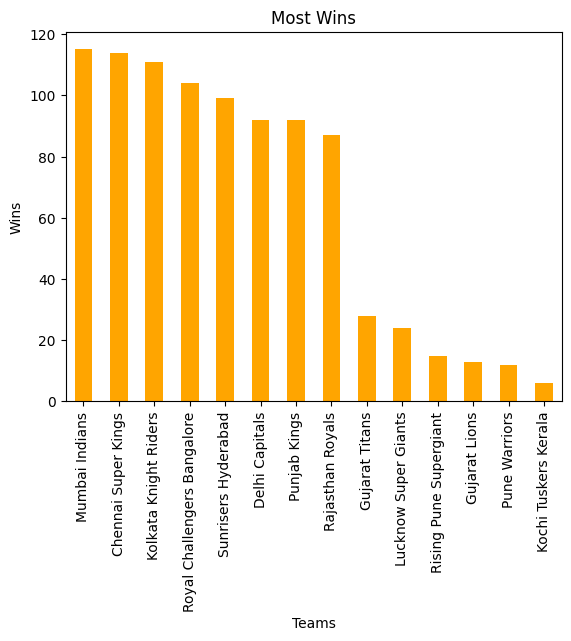

In [38]:
most_wins = df['winner'].value_counts()
most_wins.plot(kind='bar', title='Most Wins', xlabel='Teams', ylabel='Wins', color='orange')
plt.show()

## 5. Top Venues

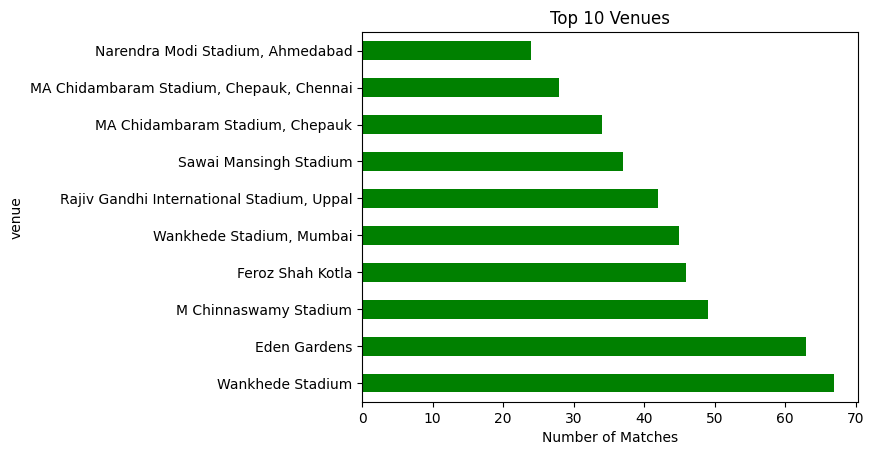

In [39]:
top_venues = df['venue'].value_counts().head(10)
top_venues.plot(kind='barh', title='Top 10 Venues', xlabel='Number of Matches', color='green')
plt.show()


## 6.Team-wise Performance Per Season

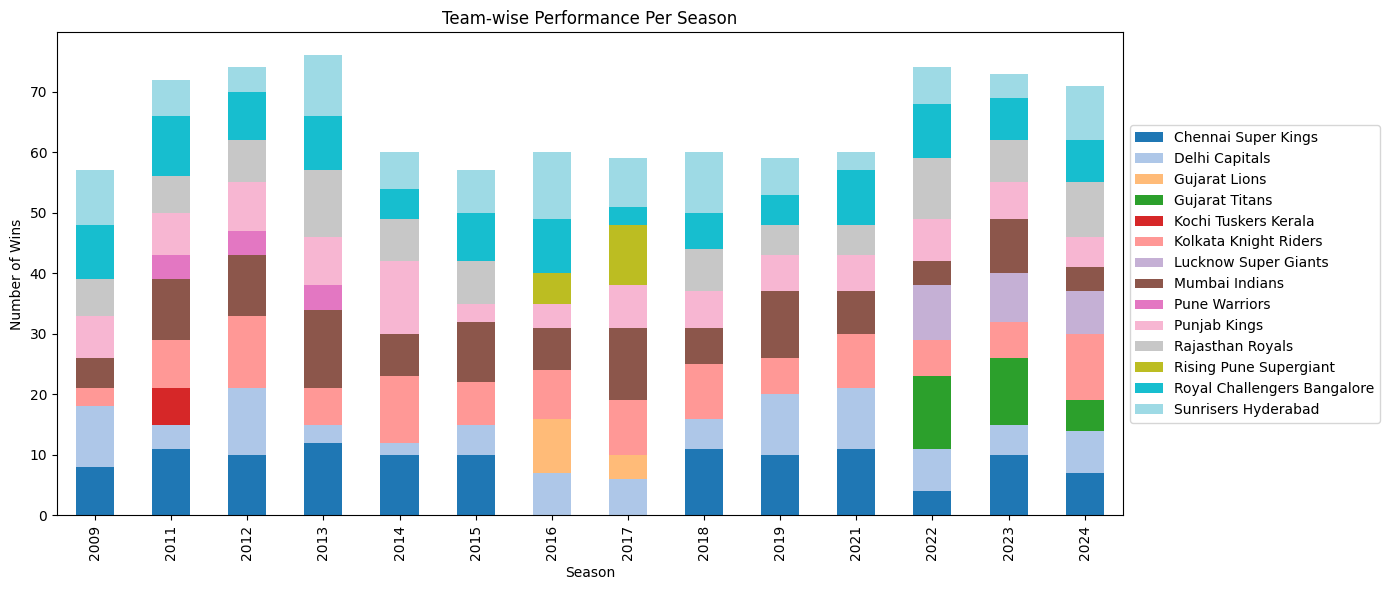

In [40]:
wins = df.groupby(['season', 'winner']).size().unstack().fillna(0)
wins.plot(kind='bar', stacked=True, figsize=(14,6), colormap='tab20')
plt.title('Team-wise Performance Per Season')
plt.xlabel('Season')
plt.ylabel('Number of Wins')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()
plt.show()


## 7.Toss Winner vs Match Winner

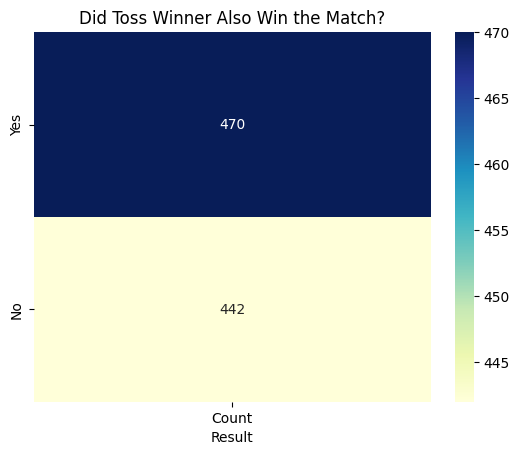

In [41]:
toss_match = df['toss_winner'] == df['winner']
data = toss_match.value_counts().rename({True: 'Yes', False: 'No'}).to_frame(name='Count')

sns.heatmap(data, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Did Toss Winner Also Win the Match?')
plt.xlabel('Result')
plt.ylabel('')
plt.show()




## 8.Most wins by teams at each venue

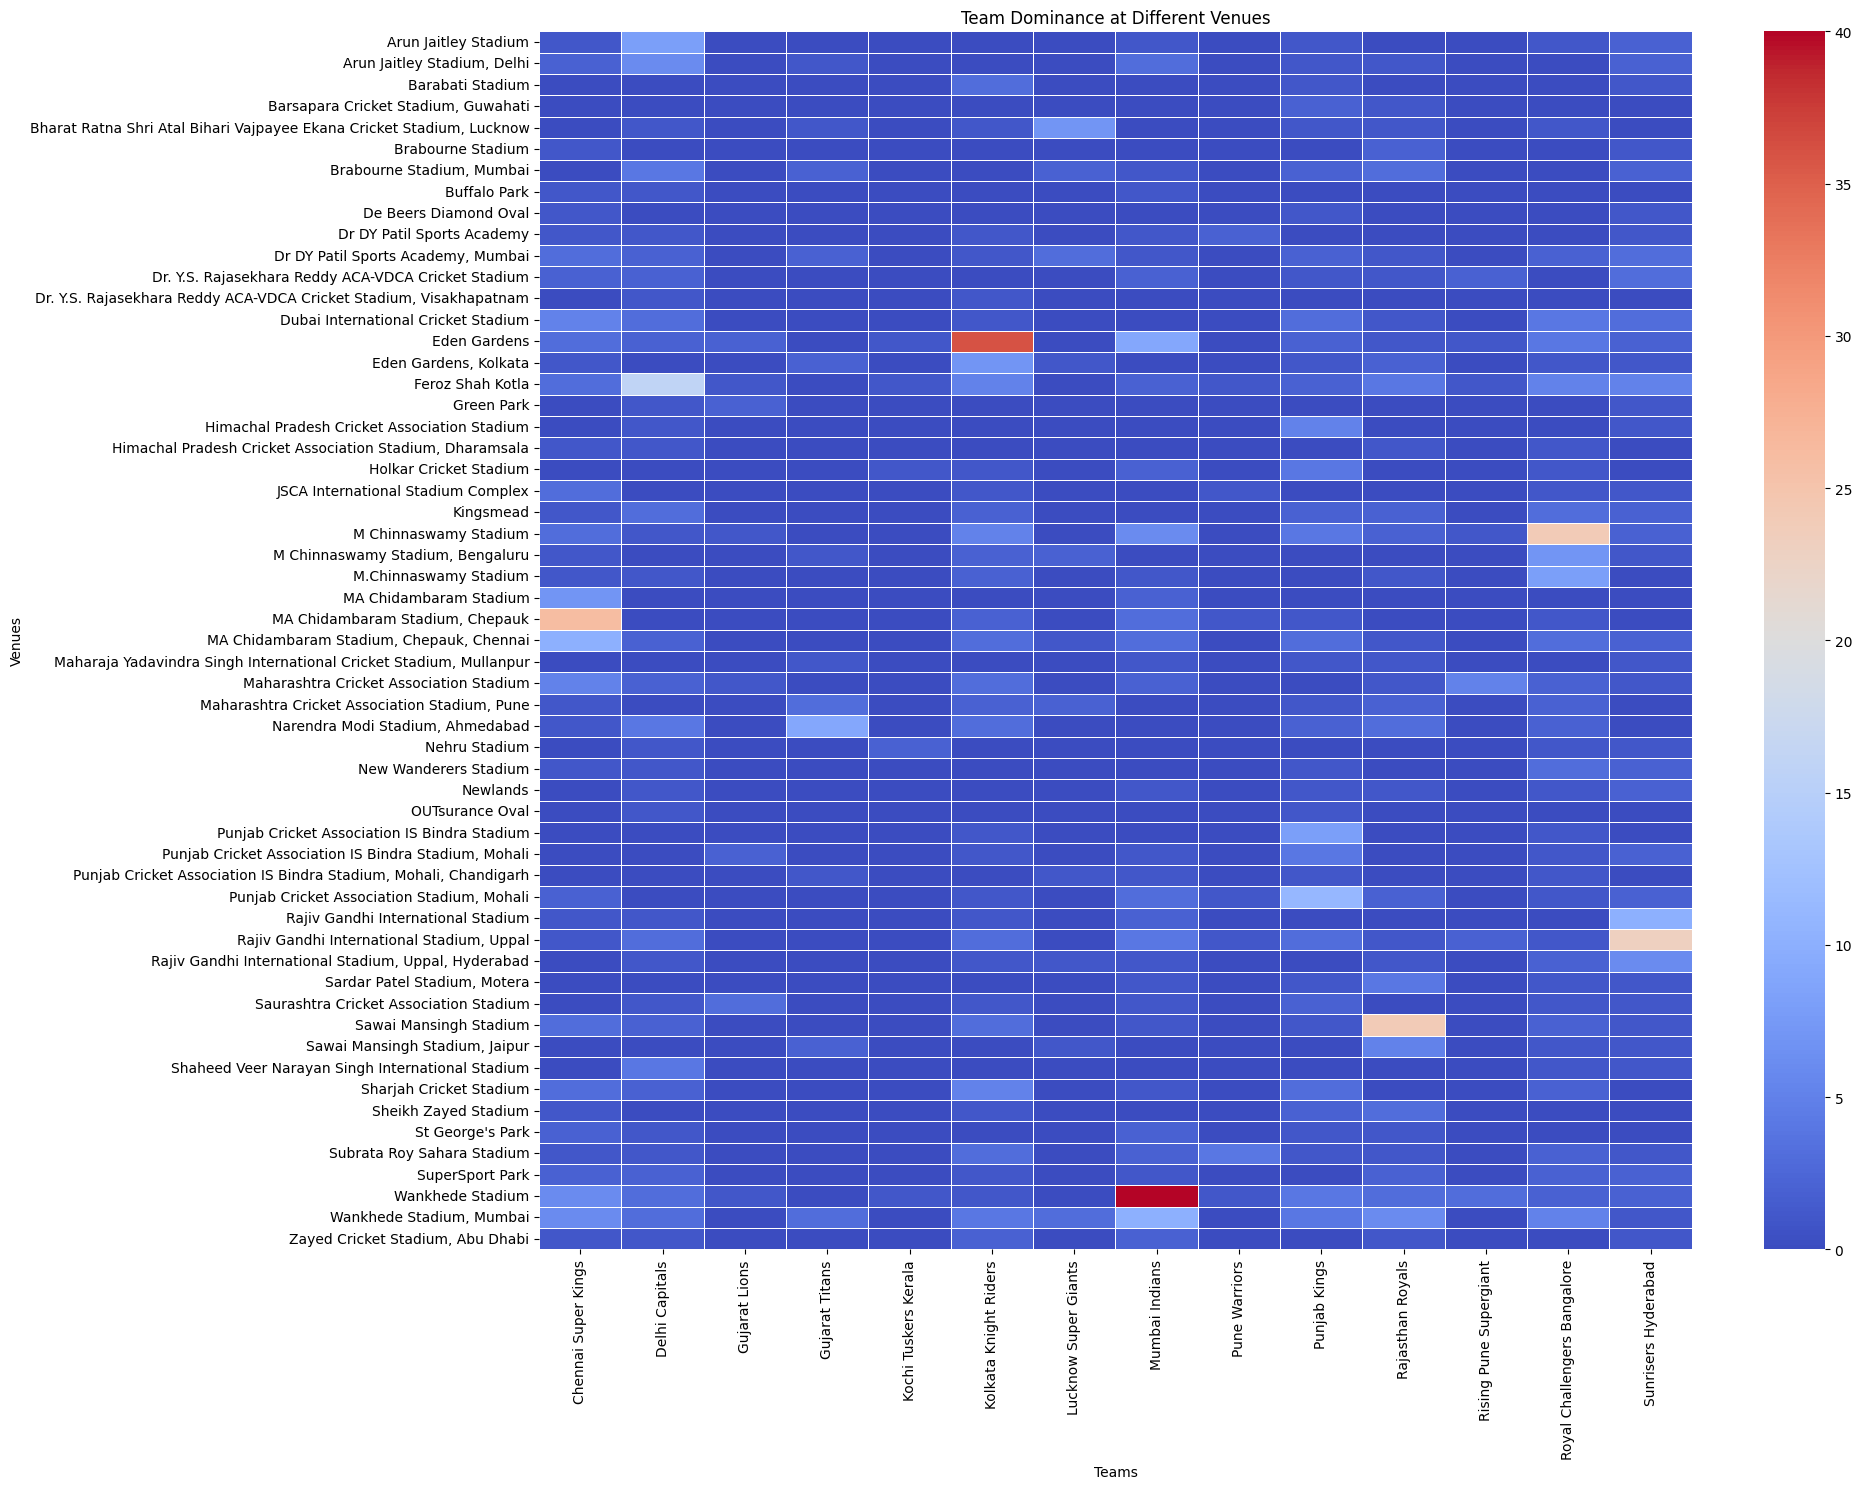

In [42]:
venue_team_wins = df.groupby(['venue', 'winner']).size().unstack(fill_value=0)

plt.figure(figsize=(20, 15))
sns.heatmap(venue_team_wins, cmap='coolwarm', linewidths=0.5)
plt.title('Team Dominance at Different Venues')
plt.xlabel('Teams')
plt.ylabel('Venues')
plt.tight_layout()
plt.show()


## 9. Top Scorers

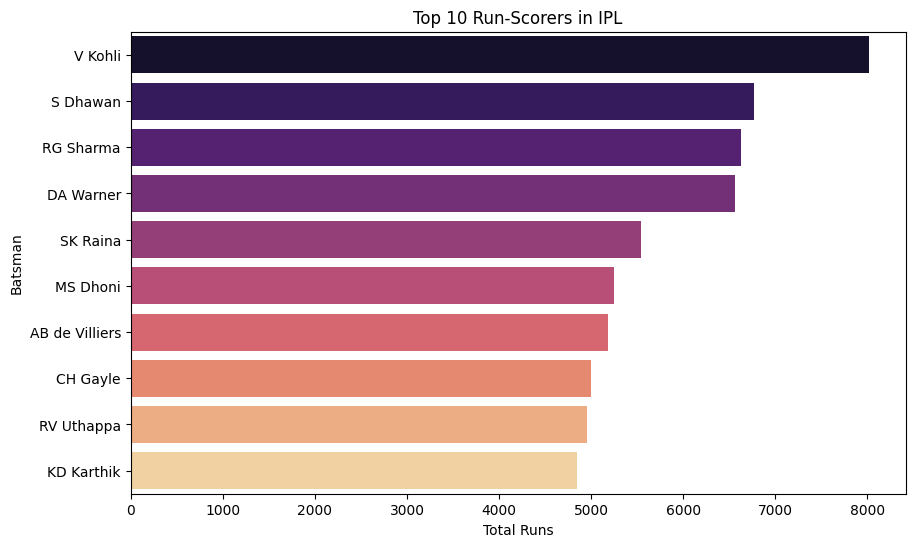

In [43]:
top_scorers = pf.groupby('batter')['batsman_runs'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_scorers.values, y=top_scorers.index, palette='magma')
plt.title('Top 10 Run-Scorers in IPL')
plt.xlabel('Total Runs')
plt.ylabel('Batsman')
plt.show()


## 10.Player of the match

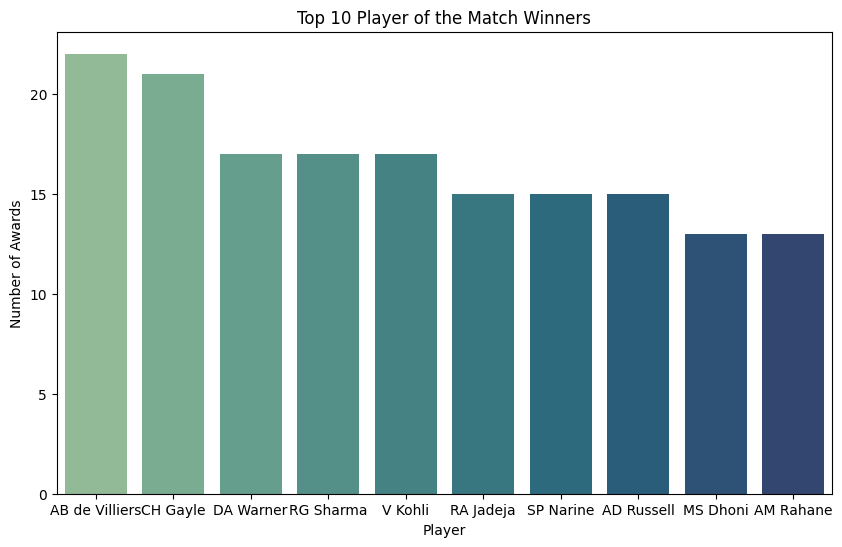

In [44]:
p = df['player_of_match'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=p.index, y=p.values, palette='crest')
plt.title('Top 10 Player of the Match Winners')
plt.xlabel('Player')
plt.ylabel('Number of Awards')
plt.show()


# Asking and Answering Questions

### 1. Who took the most wicket?

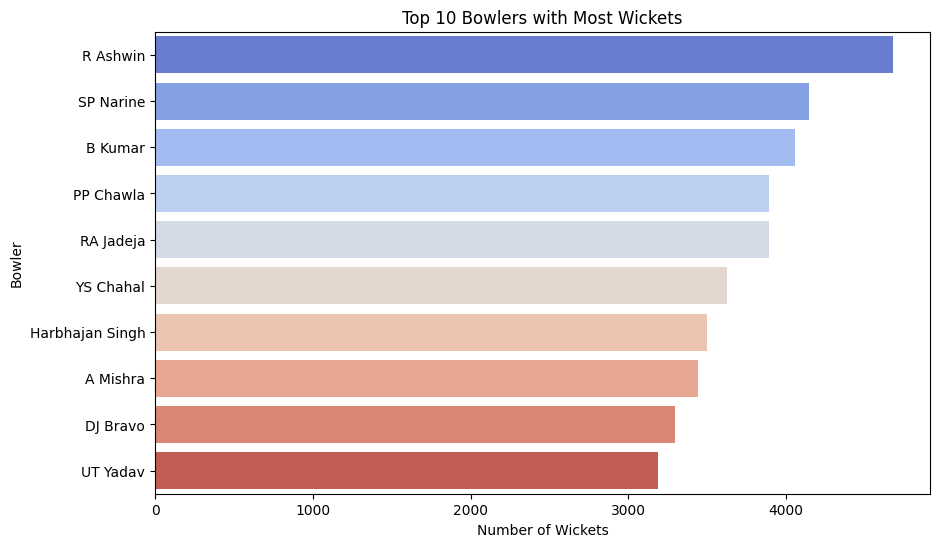

In [45]:
wickets = pf[pf['dismissal_kind'].notna()]
most_wickets = wickets['bowler'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=most_wickets.values, y=most_wickets.index, palette='coolwarm')
plt.title('Top 10 Bowlers with Most Wickets')
plt.xlabel('Number of Wickets')
plt.ylabel('Bowler')
plt.show()


> We can see that R ashwin took the most wickets

## 2. Who hit the most sixes?

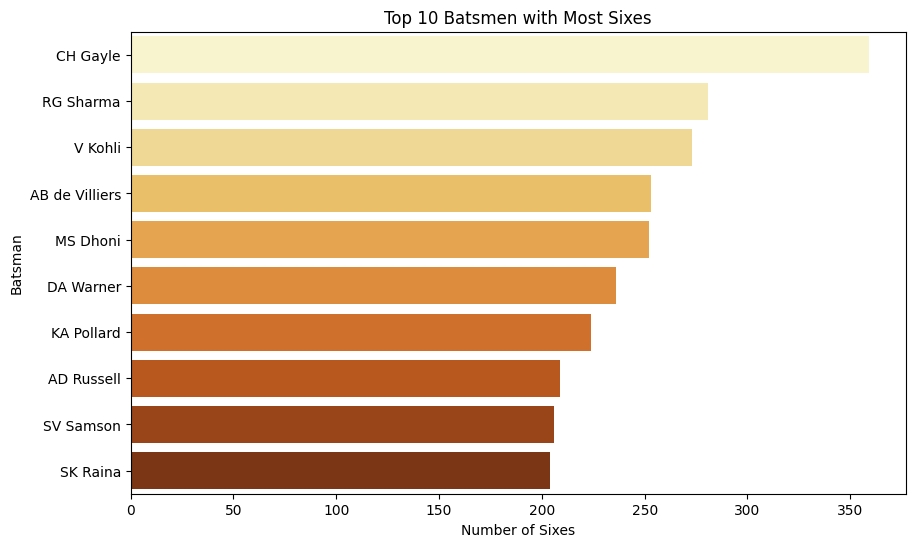

In [46]:
sixes = pf[pf['batsman_runs'] == 6]
most_sixes = sixes['batter'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=most_sixes.values, y=most_sixes.index, palette='YlOrBr')
plt.title('Top 10 Batsmen with Most Sixes')
plt.xlabel('Number of Sixes')
plt.ylabel('Batsman')
plt.show()


> We can see that CH Gayle hit the most sixes.

## 3.Does playing on the home ground provide an advantage?

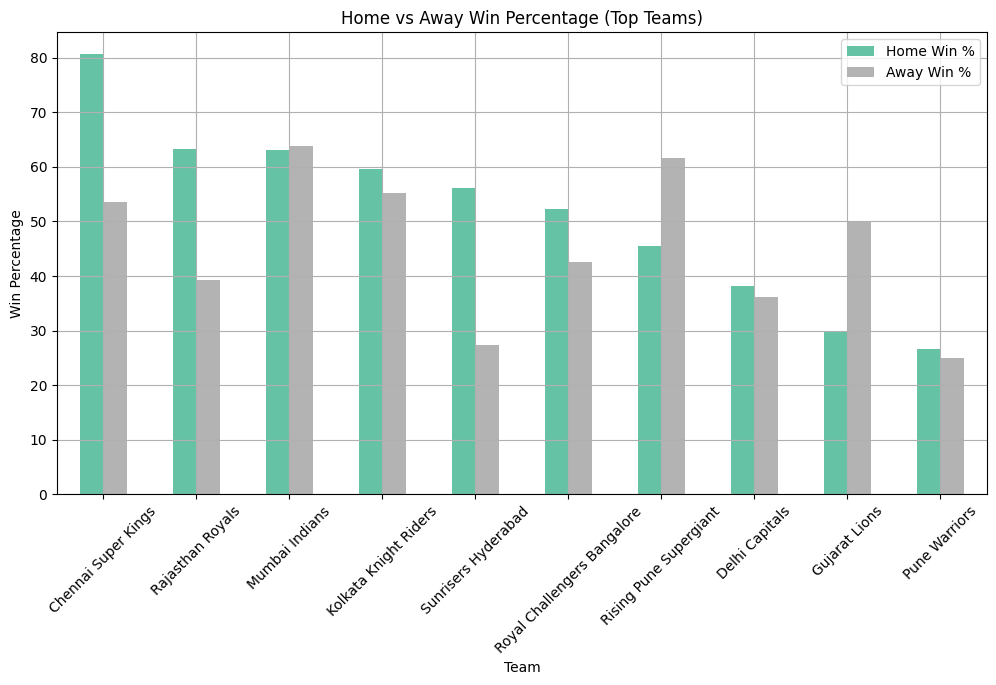

In [47]:
team_home_venues = {
    'Chennai Super Kings': 'MA Chidambaram Stadium, Chepauk',
    'Mumbai Indians': 'Wankhede Stadium',
    'Royal Challengers Bangalore': 'M Chinnaswamy Stadium',
    'Kolkata Knight Riders': 'Eden Gardens',
    'Delhi Capitals': 'Feroz Shah Kotla',
    'Sunrisers Hyderabad': 'Rajiv Gandhi International Stadium, Uppal',
    'Rajasthan Royals': 'Sawai Mansingh Stadium',
    'Kings XI Punjab': 'Punjab Cricket Association Stadium, Mohali',
    'Deccan Chargers': 'Rajiv Gandhi International Stadium, Uppal',
    'Pune Warriors': 'Subrata Roy Sahara Stadium',
    'Gujarat Lions': 'Saurashtra Cricket Association Stadium',
    'Rising Pune Supergiant': 'Maharashtra Cricket Association Stadium',
    'Lucknow Super Giants': 'BRSABV Ekana Cricket Stadium',
    'Gujarat Titans': 'Narendra Modi Stadium'
}

df['home_venue'] = df['team1'].map(team_home_venues)

home_matches = df[df['venue'] == df['home_venue']]
home_wins = home_matches[home_matches['winner'] == home_matches['team1']]


away_matches = home_matches.copy()
away_matches = away_matches[away_matches['winner'] == away_matches['team2']]


home_games = home_matches['team1'].value_counts()
away_games = home_matches['team2'].value_counts()


home_win_counts = home_wins['winner'].value_counts()
away_win_counts = away_matches['winner'].value_counts()


home_win_percent = (home_win_counts / home_games * 100).dropna().sort_values(ascending=False)
away_win_percent = (away_win_counts / away_games * 100).dropna().sort_values(ascending=False)


comparison_df = pd.DataFrame({
    'Home Win %': home_win_percent,
    'Away Win %': away_win_percent
}).fillna(0).sort_values('Home Win %', ascending=False)


comparison_df.head(10).plot(kind='bar', figsize=(12, 6), colormap='Set2')
plt.title('Home vs Away Win Percentage (Top Teams)')
plt.xlabel('Team')
plt.ylabel('Win Percentage')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


> Home ground wins are consistently high for major teams across seasons.
> However, this doesn't guarantee victory — better overall team performance, form, and match conditions still play big roles.


## 4.How many Super Overs have been played?




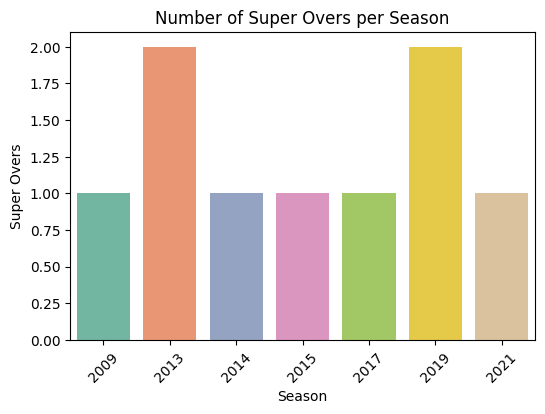

Total Super Over Matches: 9


In [48]:
super_overs = df[df['result'] == 'tie']

plt.figure(figsize=(6, 4))
sns.countplot(x='season', data=super_overs, palette='Set2')
plt.title('Number of Super Overs per Season')
plt.xlabel('Season')
plt.ylabel('Super Overs')
plt.xticks(rotation=45)
plt.show()

print("Total Super Over Matches:", super_overs.shape[0])


## 5.What is the average number of runs scored per over?

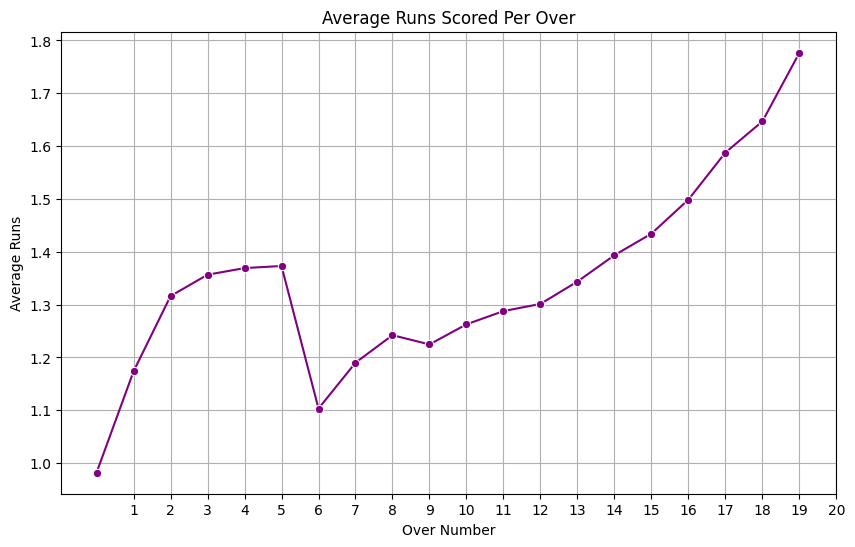

In [49]:
runs_per_over = pf.groupby('over')['total_runs'].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x=runs_per_over.index, y=runs_per_over.values, marker='o', color='purple')
plt.title('Average Runs Scored Per Over')
plt.xlabel('Over Number')
plt.ylabel('Average Runs')
plt.xticks(range(1, 21))
plt.grid(True)
plt.show()


 ### 📌 Inferences and Conclusion
After performing Exploratory Data Analysis (EDA) on the IPL dataset (2008–2024), the following insights were drawn:

🔢 General Statistics:
A total of 260920 matches were played across 14 seasons, involving 14 different teams.
The number of matches per season has gradually increased, indicating the growing popularity and expansion of the tournament.

🏆 Performance Highlights:
Mumbai Indians holds the record for most wins overall, showing consistent performance.

The top venues like Wankhede stadium and Wankhede stadium have hosted the maximum matches, making them iconic grounds for IPL.

AB de Villers has received the most Player of the Match awards, showing match-winning impact.

In terms of top scorers,Virat kholi has emerged as the highest run-getter in IPL history.

The most sixes have been smashed by CH Gayle, reflecting aggressive batting styles in T20 cricket.

📍 Venue-based Analysis:
Most wins at home grounds were secured by teams like CSK and MI, indicating a possible home-ground advantage.

🧠 Key Questions Answered:
Does home-ground give an advantage?
Yes, teams tend to win more at their home venues, likely due to familiarity with conditions and local crowd support.

How many super overs were played?
There were a total of 9 super overs, indicating how competitive some matches were.

What is the average number of runs scored per over?
The run-scoring rate fluctuates per phase, with higher rates in death overs (16–20) compared to middle overs.

📈 Trends:
Team-wise performance varies across seasons. Some teams peak for a few years and then decline.
Toss winners don’t always win the match, but winning the toss can influence decision-making.

### Things I learned 
1. Understood how to clean and preprocess real-world cricket data using Pandas.
2. Learned to group, aggregate, and merge datasets to extract team-wise and player-wise statistics.
3. Gained hands-on experience with data visualization using Matplotlib and Seaborn.
4. Created meaningful plots like bar charts and heatmaps to understand trends.
5. Explored team performance trends per season and per venue.
6. Analyzed match outcomes based on toss decisions and home-ground advantage.
7. Learned how to interpret numerical data and convert it into actionable insights.
8. Improved my ability to ask and answer analytical questions from data.


# Future Work
In the future, this analysis can be enhanced by creating interactive visualizations using tools like Plotly or Tableau. Building predictive models to forecast match outcomes, top performers, or even player form trends over multiple seasons could add a machine learning perspective. A team-wise dashboard and deeper phase-wise analysis (Powerplay, Middle, Death overs) would also provide more actionable insights for fans, analysts, and strategists.

# References
Dataset Source:
IPL Complete Dataset (2008–2024) on Kaggle

Python Libraries Used:

Pandas (Data manipulation)
NumPy (Numerical operations)
Matplotlib & Seaborn (Data visualization)
Pandas Profiling (Automated EDA reports)

Documentation & Tutorials:
Pandas Documentation
Seaborn Documentation
Matplotlib Documentation

Kaggle Notebooks for reference and inspiration- 
https://www.kaggle.com/code/prasadposture121/exploratory-data-analysis-of-ipl-matches/notebook